## Hackathon Project
Team Member: Yu Chen, Yuqian Cheng, Yue Wang

Our Hackathon Project explores a dataset of 80 cereal products. The dataset is from Kaggle. It contains cereal's name, manufacture and nutrition information. Some of the packages we use are pandas, numpy, matplotlib, seaborn, statsmodel etc.. We read in the data, there are two categorical variables and others are all continuous. We recode the categorical variables to make them more readable. Then we do value count analysis of categorical variables and throw some barplots and boxplot. Finally, we do a heatmap of all the continuous variables to have a initial view of the relationships before further analysis. \

After doing some data visualizations, we start to run regression analysis, the first model is all variables included, R-square equal to 0.93 which is great, but in terms of P-values, the variables of calories, cargo, cups have insignificant impacts on y variable. So next, we got rid of these three variables and run the regression analysis and build model 2. This time our R-square is still 0.93, but all the variables left all have significant impacts on Output. Apparently, this is better than the first model. \

To summarize, we put all of our graphs together in a radio button menu for user end application. What we have done is basically follow the code from class lecture and revise some of them to fit in our data set. For further uses, this user menu code can be a template that display any kind of graphs. As for the limitation, we also wanted to include a comparison chart for our regression models but for some reason the "for" loop cannot iterate. We would love to fix that if we have more time.

### Import Packages

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
from statsmodels.formula.api import ols
from scipy import stats  
import tkinter as tk
from tkinter import *
%matplotlib inline

### Read in Data

In [99]:
cereal = pd.read_csv("cereal.csv")
cereal.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,N,C,52.5,4,1,32.5,10.0,5.0,6,336.000000,25,3,1.0,0.33,68.402973
1,Q,C,120.0,3,5,25.0,2.0,8.0,8,135.000000,0,3,1.0,1.00,33.983679
2,K,C,52.5,4,1,65.0,9.0,7.0,5,228.571429,25,3,1.0,0.33,59.425505
3,K,C,37.5,4,0,0.0,14.0,8.0,0,0.000000,25,3,1.0,0.50,93.704912
4,R,C,165.0,2,2,200.0,1.0,14.0,8,-0.571429,25,3,1.0,0.75,34.384843


### Recode

#### Recode Type Information

In [100]:
cereal.type = cereal.type.replace(to_replace=['C','H'], value =['Cold','Hot'])
cereal.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,N,Cold,52.5,4,1,32.5,10.0,5.0,6,336.000000,25,3,1.0,0.33,68.402973
1,Q,Cold,120.0,3,5,25.0,2.0,8.0,8,135.000000,0,3,1.0,1.00,33.983679
2,K,Cold,52.5,4,1,65.0,9.0,7.0,5,228.571429,25,3,1.0,0.33,59.425505
3,K,Cold,37.5,4,0,0.0,14.0,8.0,0,0.000000,25,3,1.0,0.50,93.704912
4,R,Cold,165.0,2,2,200.0,1.0,14.0,8,-0.571429,25,3,1.0,0.75,34.384843


#### Recode Manufacturer of cereal

In [101]:
cereal.mfr = cereal.mfr.replace(to_replace=['A','G','K','N','P','Q','R'], value =['American Home Food Products',
                                                             'General Mills','Kelloggs','Nabisco',
                                                                     'Post','Quaker Oats','Ralston Purina'])
cereal.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,Nabisco,Cold,52.5,4,1,32.5,10.0,5.0,6,336.000000,25,3,1.0,0.33,68.402973
1,Quaker Oats,Cold,120.0,3,5,25.0,2.0,8.0,8,135.000000,0,3,1.0,1.00,33.983679
2,Kelloggs,Cold,52.5,4,1,65.0,9.0,7.0,5,228.571429,25,3,1.0,0.33,59.425505
3,Kelloggs,Cold,37.5,4,0,0.0,14.0,8.0,0,0.000000,25,3,1.0,0.50,93.704912
4,Ralston Purina,Cold,165.0,2,2,200.0,1.0,14.0,8,-0.571429,25,3,1.0,0.75,34.384843


### Analysis For Categorical Variables

#### Type Analysis

In [102]:
TypeCnts = DataFrame(cereal.type.value_counts())
TypeCnts

,type
Cold,74
Hot,3


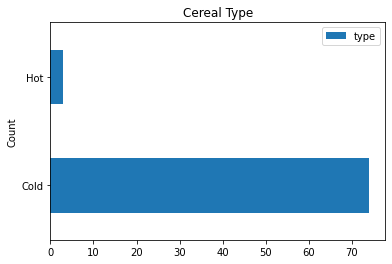

In [103]:
TypeCnts.plot.barh()
plt.title('Cereal Type')
plt.ylabel('Count')
plt.show()

#### Manufacture Analysis

In [104]:
MfrCnts = DataFrame(cereal.mfr.value_counts())
MfrCnts

,mfr
Kelloggs,23
General Mills,22
Post,9
Quaker Oats,8
Ralston Purina,8
Nabisco,6
American Home Food Products,1


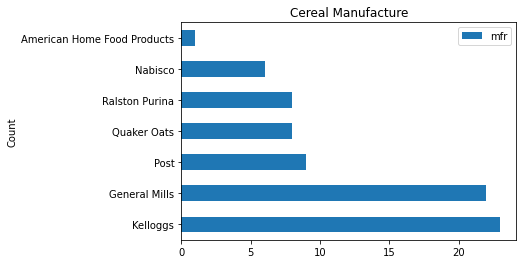

In [105]:
MfrCnts.plot.barh()
plt.title('Cereal Manufacture')
plt.ylabel('Count')
plt.show()

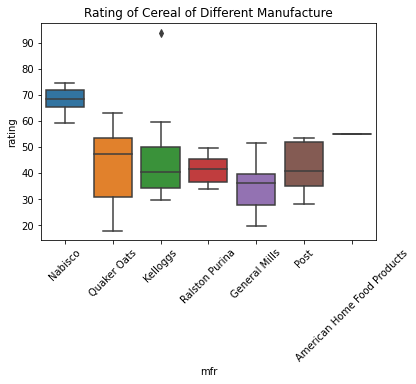

In [106]:
sns.boxplot(x="mfr", y="rating",data=cereal) 
plt.xticks(rotation=45)
plt.title('Rating of Cereal of Different Manufacture')
plt.show() 

### For Continuous Variables

#### Heatmap

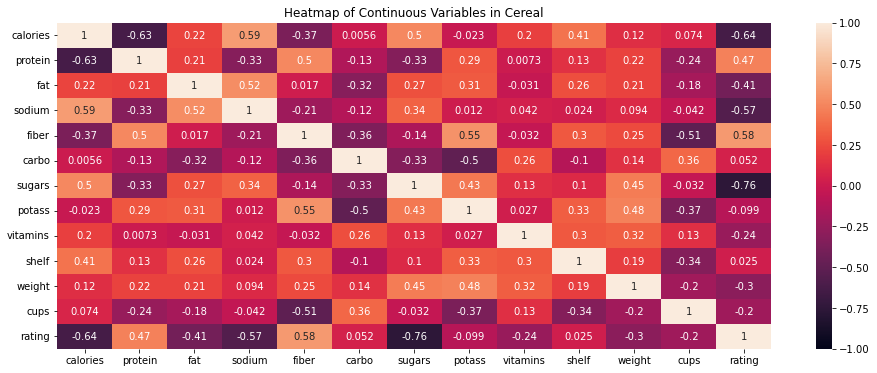

In [107]:
cereal[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight',
       'cups','rating']]
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(cereal.corr(),vmin=-1,vmax=1,annot=True)
plt.title('Heatmap of Continuous Variables in Cereal')
plt.show()

### Regression

#### Model 1
All Variables included

In [108]:
model1= ols('rating ~ calories+protein+fat+sodium+fiber+carbo+sugars+potass+vitamins+shelf+weight+cups', data=cereal).fit()
print(model1.summary())   

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     72.82
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           1.52e-32
Time:                        16:52:23   Log-Likelihood:                -208.86
No. Observations:                  77   AIC:                             443.7
Df Residuals:                      64   BIC:                             474.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8389      4.834     11.758      0.0

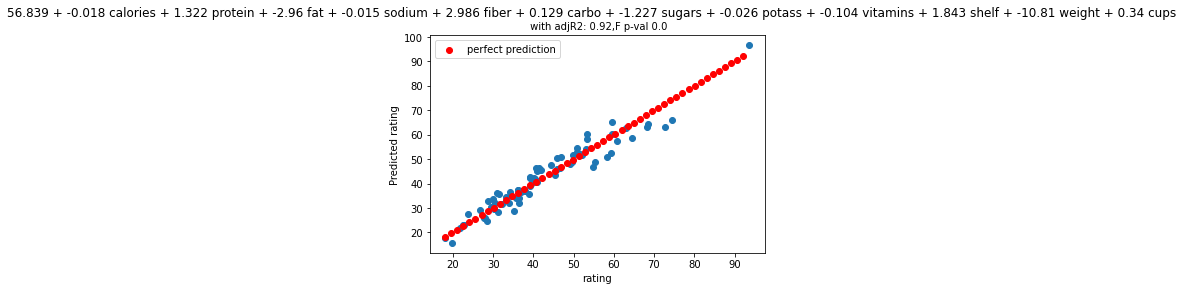

In [109]:
def my_multreg(model, ydata, actvspredplot=True, residplot=True):
    r2adj = round(model.rsquared_adj,2) #use for multiple regression
    p_val = round(model.f_pvalue,4)
    coefs = model.params
    coefsindex = coefs.index
    regeq = round(coefs[0],3) #first get intercept
    cnt = 1
    for i in coefs[1:]:
        regeq=f"{regeq} + {round(i,3)} {coefsindex[cnt]}"
        cnt = cnt + 1
    y=cereal.rating
    miny=y.min()
    maxy=y.max()
    if actvspredplot==True:
        #Scatterplot for Multiple Regression - y vs predicted y
        predict_y = model.predict()
        plt.scatter(y,predict_y)
        diag = np.arange(miny,maxy,(maxy-miny)/50)
        plt.scatter(diag,diag,color='red',label='perfect prediction')
        plt.suptitle(regeq)
        plt.title(f' with adjR2: {r2adj},F p-val {p_val}',size=10)
        plt.xlabel(ydata.name)
        plt.ylabel('Predicted ' + ydata.name)
        plt.legend(loc='best')
        plt.show()

ydata= cereal['rating']
my_multreg(model1,ydata)

#### Model 2
Get rid of all insignificant variables( cups, calories, carbo)

In [110]:
model2= ols('rating ~ protein+fat+sodium+fiber+sugars+potass+vitamins+shelf+weight', data=cereal).fit()
print(model2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     99.04
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           3.60e-35
Time:                        16:52:28   Log-Likelihood:                -209.79
No. Observations:                  77   AIC:                             439.6
Df Residuals:                      67   BIC:                             463.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.1144      3.785     15.090      0.0

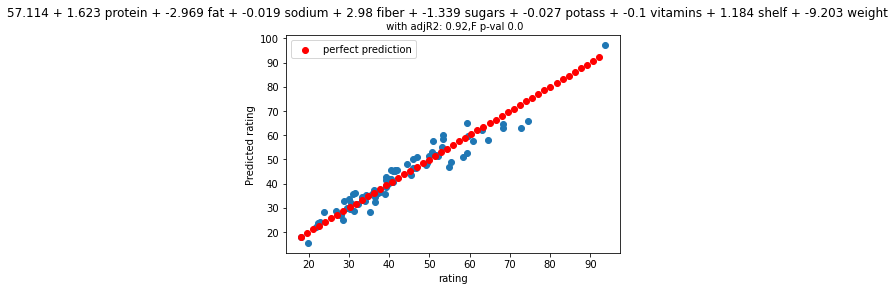

In [111]:
my_multreg(model2,ydata)


Regression for Significant Variables


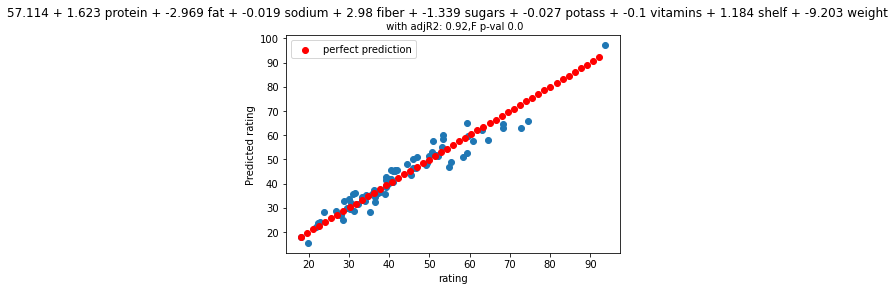

In [113]:
root = tk.Tk()
root.title('Choose your Output')
v = tk.IntVar()
v.set(1)
menuchoices = [
"Barplot of Manufacture of Cereal",
"Rating of Cereal of Different Manufacture",
"Heatmap of Continuous Variables",
"Regression for All Variables",
"Regression for Significant Variables"
]
def Results(df):
    if v.get() == 0:
        print("\nBarplot of Manufacture of Cereal")
        MfrCnts.plot.barh()
        plt.title('Cereal Manufacture')
        plt.ylabel('Count')
        plt.show()
        
    elif v.get() == 1:
        print("\nRating of Cereal of Different Manufacture")
        sns.boxplot(x="mfr", y="rating", data=cereal) 
        plt.title('Rating of Cereal of Different Manufacture')
        plt.xticks(rotation=45)
        plt.show() 
        
    elif v.get() == 2:
        print("\nHeatmap of Continuous Variables")
        cereal[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight',
       'cups','rating']]
        plt.figure(figsize=(16,6))
        heatmap = sns.heatmap(cereal.corr(),vmin=-1,vmax=1,annot=True)
        plt.title('Heatmap of Continuous Variables in Cereal')
        plt.show()
        
    elif v.get() == 3:
        print("\nRegression for All Variables")
        model1= ols('rating ~ calories+protein+fat+sodium+fiber+carbo+sugars+potass+vitamins+shelf+weight+cups', data=cereal).fit()
        my_multreg(model1,ydata)
    
    else:
        print("\nRegression for Significant Variables")
        model2= ols('rating ~ protein+fat+sodium+fiber+sugars+potass+vitamins+shelf+weight', data=cereal).fit()
        my_multreg(model2,ydata)
        

tk.Label(root,
         text="""Choose your menu option:""",
            justify = tk.LEFT,
            padx = 20).pack()

for val, choice in enumerate(menuchoices):
    tk.Radiobutton(root,
                   text=choice,
                    padx = 20,
                    variable=v,
                    value=val).pack(anchor=tk.W)
button = tk.Button(root, text='OK', width=25, 
command=root.destroy)
button.pack()

root.mainloop()
Results(cereal)